In [1]:
# Load Packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.regularizers import l2
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.utils import np_utils
from tensorflow import estimator
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Dataset

## 1. load dataset

In [2]:
os.chdir('C:/Users/tku/Desktop/data/finish')
filename = 'b.csv'
df = pd.read_csv(filename)
df_dum = pd.get_dummies(df)
list(df_dum)

['chinese',
 'english',
 'math',
 'society',
 'science',
 'PR',
 'H_GPA',
 'B',
 'B_10_A',
 'B_10_B',
 'B_10_C',
 'B_10_D',
 'B_10_E',
 'B_10_F',
 'B_10_G',
 'B_10_H',
 'B_10_I',
 'B_10_J',
 'B_5_A',
 'B_5_B',
 'B_5_C',
 'B_5_D',
 'B_5_F',
 'B_3_A',
 'B_3_B',
 'B_3_F',
 'B_2_A',
 'B_2_F']

## 3. Split the data up in train and test sets

In [3]:
#X_train, X_test, Y_train10, Y_test10, Y_train5, Y_test5, Y_train3, Y_test3, Y_train2, Y_test2=train_test_split(X,Y10,Y5,Y3,Y2, test_size=0.10, random_state=1)
train_set, validate_set, test_set = \
              np.split(df_dum.sample(frac=1, random_state=1), 
                       [int(.8*len(df_dum)), int(.9*len(df_dum))])

## 2. Specify the target labels and flatten the array 

In [4]:
X_train = train_set[['chinese', 'english', 'math', 'society', 'science', 'PR', 'H_GPA']]
X_validate = validate_set[['chinese', 'english', 'math', 'society', 'science', 'PR', 'H_GPA']]
X_test = test_set[['chinese', 'english', 'math', 'society', 'science', 'PR', 'H_GPA']]

Y_train10= train_set[['B_10_A', 'B_10_B', 'B_10_C', 'B_10_D', 'B_10_E', 'B_10_F', 'B_10_G', 'B_10_H', 'B_10_I', 'B_10_J']]
Y_validate10= validate_set[['B_10_A', 'B_10_B', 'B_10_C', 'B_10_D', 'B_10_E', 'B_10_F', 'B_10_G', 'B_10_H', 'B_10_I','B_10_J']]
Y_test10= test_set[['B_10_A', 'B_10_B', 'B_10_C', 'B_10_D', 'B_10_E', 'B_10_F', 'B_10_G', 'B_10_H', 'B_10_I','B_10_J']]

Y_train5= train_set[['B_5_A', 'B_5_B', 'B_5_C', 'B_5_D', 'B_5_F']]
Y_validate5= validate_set[['B_5_A', 'B_5_B', 'B_5_C', 'B_5_D', 'B_5_F']]
Y_test5= test_set[['B_5_A', 'B_5_B', 'B_5_C', 'B_5_D', 'B_5_F']]

Y_train3= train_set[['B_3_A', 'B_3_B', 'B_3_F']]
Y_validate3= validate_set[['B_3_A', 'B_3_B', 'B_3_F']]
Y_test3= test_set[['B_3_A', 'B_3_B', 'B_3_F']]

Y_train2= train_set[['B_2_A', 'B_2_F']]
Y_validate2= validate_set[['B_2_A', 'B_2_F']]
Y_test2= test_set[['B_2_A', 'B_2_F']]

In [5]:
print(Y_train10.shape)
print(Y_validate10.shape)
print(Y_test10.shape)

(260, 10)
(33, 10)
(33, 10)


# DNN

## 1. Initialize the DNN constructor

In [6]:
# define vars
input_num_units = 7
output_num_units10 = 10
output_num_units5 = 5
output_num_units3 = 3
output_num_units2 = 2

layers = 3
hiddenadd_num_units = 10
batch_size = 10
epochs = 5

## 2. Define model

In [7]:
model10=tf.keras.Sequential()
model10.add(Dense(hiddenadd_num_units, input_shape=(7,), kernel_regularizer=l2(0.00001), activation='relu'))
model10.add(Dropout(0.4))
model5=tf.keras.Sequential()
model5.add(Dense(hiddenadd_num_units, input_shape=(7,), kernel_regularizer=l2(0.00001), activation='relu'))
model5.add(Dropout(0.4))
model3=tf.keras.Sequential()
model3.add(Dense(hiddenadd_num_units, input_shape=(7,), kernel_regularizer=l2(0.00001), activation='relu'))
model3.add(Dropout(0.4))
model2=tf.keras.Sequential()
model2.add(Dense(hiddenadd_num_units, input_shape=(7,), kernel_regularizer=l2(0.00001), activation='relu'))
model2.add(Dropout(0.4))
for i in range(layers-2):
    model10.add(Dense(hiddenadd_num_units, kernel_regularizer=l2(0.00001),  activation='relu'))
    model10.add(Dropout(0.4))
    model5.add(Dense(hiddenadd_num_units, kernel_regularizer=l2(0.00001),  activation='relu'))
    model5.add(Dropout(0.4))
    model3.add(Dense(hiddenadd_num_units, kernel_regularizer=l2(0.00001),  activation='relu'))
    model3.add(Dropout(0.4))
    model2.add(Dense(hiddenadd_num_units, kernel_regularizer=l2(0.00001),  activation='relu'))
    model2.add(Dropout(0.4))
model10.add(Dense(output_num_units10, kernel_regularizer=l2(0.00001), activation='softmax'))
model5.add(Dense(output_num_units5, kernel_regularizer=l2(0.00001), activation='softmax'))
model3.add(Dense(output_num_units3, kernel_regularizer=l2(0.00001), activation='softmax'))
model2.add(Dense(output_num_units2, kernel_regularizer=l2(0.00001), activation='softmax'))

In [8]:
# Model summary
print("                                               ")
model10.summary()
print("                                               ")
model5.summary()
print("                                               ")
model3.summary()
print("                                               ")
model2.summary()
print("                                               ")

                                               
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                80        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________
                                               
Model: "sequential_1"
______

## 3. Define optimizer: Stochastic gradient descent 

In [9]:
SGD = tf.keras.optimizers.SGD()

## 4. Compile model

In [10]:
model10.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model5.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model3.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model2.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

## 5. Fit model 

In [11]:
history10=model10.fit(X_train, 
          Y_train10,
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(X_validate,Y_validate10),
          verbose=1,
          )
history5=model5.fit(X_train, 
          Y_train5,
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(X_validate,Y_validate5),
          verbose=1,
          )
history3=model3.fit(X_train, 
          Y_train3,
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(X_validate,Y_validate3),
          verbose=1,
          )
history2=model2.fit(X_train, 
          Y_train2,
          epochs=epochs, 
          batch_size=batch_size,  
          validation_data=(X_validate,Y_validate2),
          verbose=1,
          )

Epoch 1/5
26/26 [==============================] - 3s 86ms/step - loss: 24.6953 - categorical_accuracy: 0.1440 - val_loss: 2.2812 - val_categorical_accuracy: 0.2727
Epoch 2/5
26/26 [==============================] - 0s 9ms/step - loss: 2.2799 - categorical_accuracy: 0.2488 - val_loss: 2.2612 - val_categorical_accuracy: 0.2727
Epoch 3/5
26/26 [==============================] - 0s 8ms/step - loss: 2.2570 - categorical_accuracy: 0.2819 - val_loss: 2.2423 - val_categorical_accuracy: 0.2727
Epoch 4/5
26/26 [==============================] - 0s 11ms/step - loss: 2.2477 - categorical_accuracy: 0.2384 - val_loss: 2.2244 - val_categorical_accuracy: 0.2727
Epoch 5/5
26/26 [==============================] - 0s 8ms/step - loss: 2.2222 - categorical_accuracy: 0.2136 - val_loss: 2.2073 - val_categorical_accuracy: 0.2727
Epoch 1/5
26/26 [==============================] - 1s 20ms/step - loss: 21.0946 - categorical_accuracy: 0.2533 - val_loss: 1.6053 - val_categorical_accuracy: 0.1818
Epoch 2/5
26/26 [

## 6. summarize performance

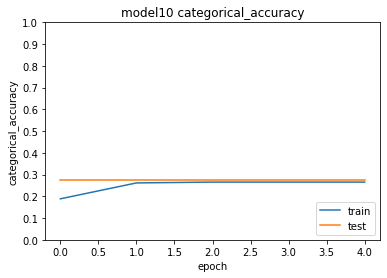

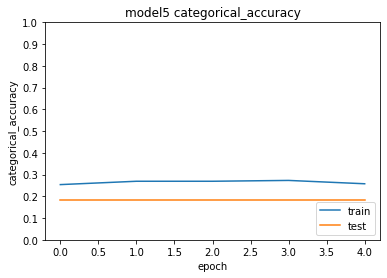

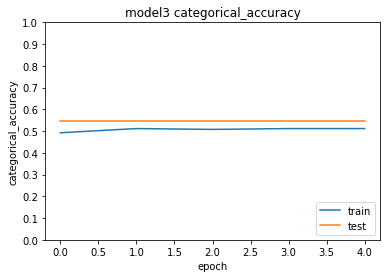

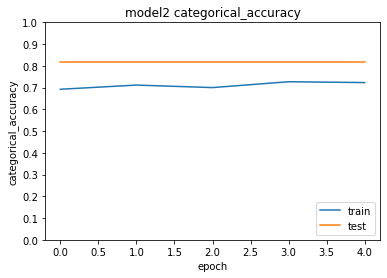

In [12]:
# summarize history for accuracy
plt.plot(history10.history['categorical_accuracy'])
plt.plot(history10.history['val_categorical_accuracy'])
plt.title('model10 categorical_accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

# summarize history for accuracy
plt.plot(history5.history['categorical_accuracy'])
plt.plot(history5.history['val_categorical_accuracy'])
plt.title('model5 categorical_accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

# summarize history for accuracy
plt.plot(history3.history['categorical_accuracy'])
plt.plot(history3.history['val_categorical_accuracy'])
plt.title('model3 categorical_accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

# summarize history for accuracy
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.title('model2 categorical_accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

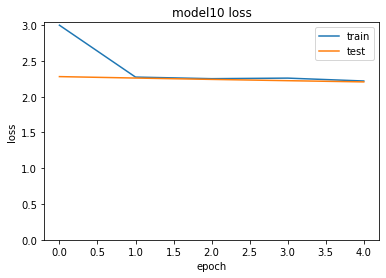

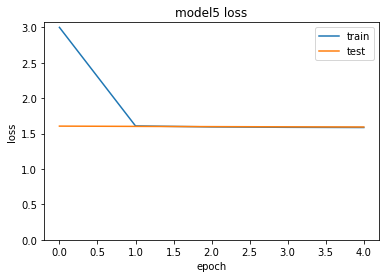

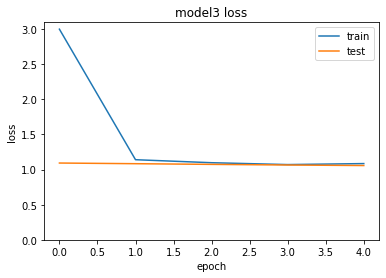

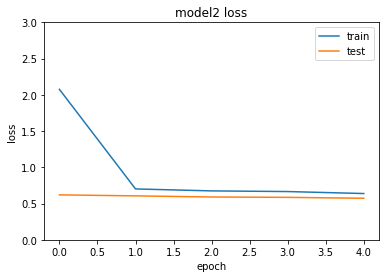

In [13]:
# initializing repl_chr 
repl_chr = 3
  
# one liner to solve problem
loss10 = [repl_chr if ele > 3 else ele for ele in history10.history['loss']]
val_loss10 = [repl_chr if ele > 3 else ele for ele in history10.history['val_loss']]
loss5 = [repl_chr if ele > 3 else ele for ele in history5.history['loss']]
val_loss5 = [repl_chr if ele > 3 else ele for ele in history5.history['val_loss']]
loss3 = [repl_chr if ele > 3 else ele for ele in history3.history['loss']]
val_loss3 = [repl_chr if ele > 3 else ele for ele in history3.history['val_loss']]
loss2 = [repl_chr if ele > 3 else ele for ele in history2.history['loss']]
val_loss2 = [repl_chr if ele > 3 else ele for ele in history2.history['val_loss']]


# summarize history for loss
plt.plot(loss10)
plt.plot(val_loss10)
plt.title('model10 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.yticks([0,0.5,1,1.5,2,2.5,3])
plt.show()

# summarize history for loss
plt.plot(loss5)
plt.plot(val_loss5)
plt.title('model5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.yticks([0,0.5,1,1.5,2,2.5,3])
plt.show()

# summarize history for loss
plt.plot(loss3)
plt.plot(val_loss3)
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.yticks([0,0.5,1,1.5,2,2.5,3])
plt.show()

# summarize history for loss
plt.plot(loss2)
plt.plot(val_loss2)
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.yticks([0,0.5,1,1.5,2,2.5,3])
plt.show()

## 7. Model evaluation with test data set 

In [14]:
# Prediction at test data set
Y_pred10 = model10.predict(X_test)
score10 = model10.evaluate(X_test, Y_test10,batch_size=10, verbose=1)

4/4 [==============================] - 0s 1ms/step - loss: 2.2397 - categorical_accuracy: 0.0606


In [15]:
# Prediction at test data set
Y_pred5 = model5.predict(X_test)
score5 = model5.evaluate(X_test, Y_test5,batch_size=10, verbose=1)

4/4 [==============================] - 0s 2ms/step - loss: 1.6249 - categorical_accuracy: 0.2121


In [16]:
# Prediction at test data set
#Y_pred3 = model3.predict(X_test)
score3 = model3.evaluate(X_test, Y_test3,batch_size=10, verbose=1)

4/4 [==============================] - 0s 2ms/step - loss: 1.1186 - categorical_accuracy: 0.3030


In [17]:
# Prediction at test data set
#Y_pred2 = model2.predict(X_test)
score2 = model2.evaluate(X_test, Y_test2,batch_size=10, verbose=1)

4/4 [==============================] - 0s 2ms/step - loss: 0.5819 - categorical_accuracy: 0.7879


In [18]:
print("-----層:",layers,"/節點:",hiddenadd_num_units,"/batch_size:",batch_size,"/epoch:",epochs,"-----")
print("分10類：")
print("categorical_accuracy : %.2f%%" % (score10[1]*100))
print("                loss : %.2f" % (score10[0]))
print(" ")
print("分5類：")
print("categorical_accuracy : %.2f%%" % (score5[1]*100))
print("                loss : %.2f" % (score5[0]))
print(" ")
print("分3類：")
print("categorical_accuracy : %.2f%%" % (score3[1]*100))
print("                loss : %.2f" % (score3[0]))
print(" ")
print("分2類：")
print("categorical_accuracy : %.2f%%" % (score2[1]*100))
print("                loss : %.2f" % (score2[0]))
print(" ")

-----層: 3 /節點: 10 /batch_size: 10 /epoch: 5 -----
分10類：
categorical_accuracy : 6.06%
                loss : 2.24
 
分5類：
categorical_accuracy : 21.21%
                loss : 1.62
 
分3類：
categorical_accuracy : 30.30%
                loss : 1.12
 
分2類：
categorical_accuracy : 78.79%
                loss : 0.58
 


In [19]:
Y_pred10c = Y_pred10
Y_test10c = Y_test10.to_numpy(dtype='float')
Y_pred5c = Y_pred5
Y_test5c = Y_test5.to_numpy(dtype='float')

In [20]:
for i in range(Y_pred10c.shape[0]):
    maxY=max(Y_pred10c[i])
    for j in range(Y_pred10c.shape[1]):
        if Y_pred10c[i,j] == maxY:
            Y_pred10c[i,j] = 1
        else:
            Y_pred10c[i,j] = 0
            
for i in range(Y_pred5c.shape[0]):
    maxY=max(Y_pred5c[i])
    for j in range(Y_pred5c.shape[1]):
        if Y_pred5c[i,j] == maxY:
            Y_pred5c[i,j] = 1
        else:
            Y_pred5c[i,j] = 0

In [21]:
oneAway10 =1
            
for i in range(Y_pred10c.shape[0]):
    for j in range(Y_pred10c.shape[1]):
        if Y_test10c[i,j] == 1:
            if j == 0:
                if Y_pred10c[i,j] == 1 or Y_pred10c[i,j+1] == 1:
                    oneAway10 = oneAway10 +1
            elif j == Y_pred10c.shape[1]-1:
                if Y_pred10c[i,j-1] == 1 or Y_pred10c[i,j] == 1:
                    oneAway10 = oneAway10 +1
            else:
                if Y_pred10c[i,j-1] == 1 or Y_pred10c[i,j] or Y_pred10c[i,j+1] == 1:
                    oneAway10 = oneAway10 +1
            break
print("oneAway accurency of 10class =%.2f%%" % (oneAway10/Y_pred10c.shape[0]*100))

oneAway5 =1
            
for i in range(Y_pred5c.shape[0]):
    for j in range(Y_pred5c.shape[1]):
        if Y_test5c[i,j] == 1:
            if j == 0:
                if Y_pred5c[i,j] == 1 or Y_pred5c[i,j+1] == 1:
                    oneAway5 = oneAway5 +1
            elif j == 3:
                if Y_pred5c[i,j-1] == 1 or Y_pred5c[i,j] == 1:
                    oneAway5 = oneAway5 +1
            elif j == 4:
                if Y_pred5c[i,j] == 1:
                    oneAway5 = oneAway5 +1
            else:
                if Y_pred5c[i,j-1] == 1 or Y_pred5c[i,j] or Y_pred5c[i,j+1] == 1:
                    oneAway5 = oneAway5 +1
            break
print("oneAway accurency of 5class =%.2f%%" % (oneAway5/Y_pred5c.shape[0]*100))

oneAway accurency of 10class =48.48%
oneAway accurency of 5class =24.24%


In [22]:
from tempfile import NamedTemporaryFile
import shutil
import csv

filename = 'DNN_avg_result.csv'
tempfile = NamedTemporaryFile(mode='w', delete=False)

fields = ['b','c10_accur','c10_oneAway','c5_accur','c5_oneAway','c3_accur','c2_accur']
writelist = ["DNN","b",
             "%.2f%%" % (score10[1]*100),"%.2f%%" % (oneAway10/Y_pred10c.shape[0]*100),
             "%.2f%%" % (score5[1]*100),"%.2f%%" % (oneAway5/Y_pred5c.shape[0]*100),
             "%.2f%%" % (score3[1]*100),"%.2f%%" % (score2[1]*100)]

with open('result.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(writelist)
    csvfile.close()